<center>
  <a href="MLSD-05-FeatureSelection-A.ipynb" target="_self">Feature Selection A</a> | <a href="./">Content Page</a> | <a href="MLSD-05-FeatureSelection-Ex-1.ipynb">Feature Selection Exercise 1</a>
</center>

# <center>FEATURE SELECTION B</center>

<center><b>Copyright &copy 2023 by DR DANNY POO</b><br> e:dannypoo@nus.edu.sg<br> w:drdannypoo.com</center><br>

# Purpose
- Feature selection or variable selection is a process in the feature engineering technique which is used to reduce the number of dependent variables. 
- Achieved by picking out only those that have a paramount effect on the target attribute. 

# Dataset
Heart Failure Clinical dataset containing medical records of patients who had left ventricular systolic dysfunction and with a history of heart failure.

The dataset contains the medical records of 299 heart failure patients collected at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

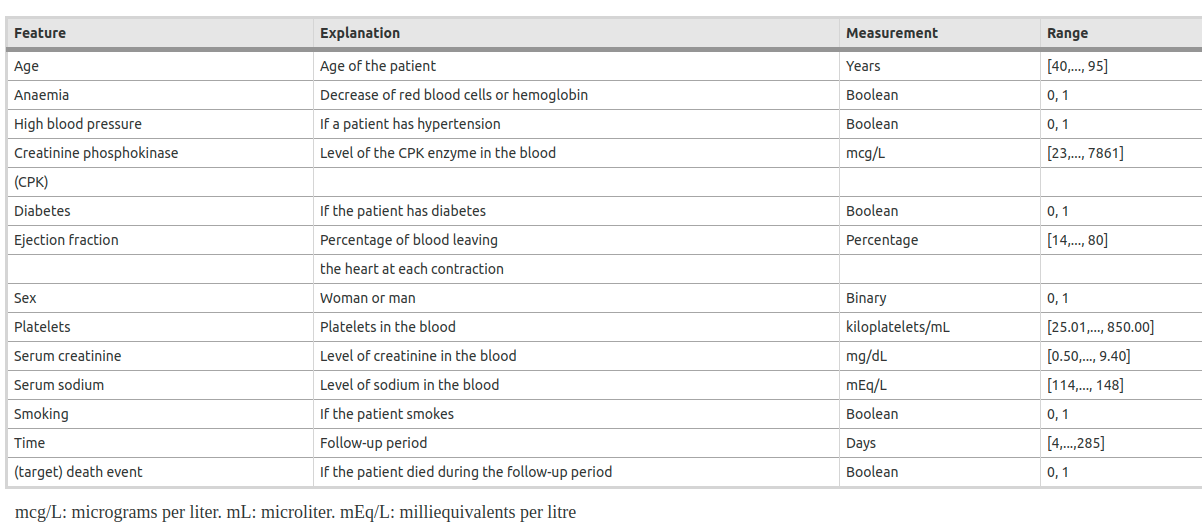

# Feature Selection Methods
- Extra-tree Classifier
- Chi-square test
- Forward Stepwise Selection
- Pearson Correlation
- Logit Model

# Read in and Explore Data Set

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

In [ ]:
# Read in data
df = pd.read_csv('./data/heartFailures/heartFailures.csv')
df.head()

In [ ]:
# What are the columns?
df.columns

In [ ]:
# Create 3 more features 'Heart_failure', 'Smokes', 'Gender'
df['Heart_failure']=df['DEATH_EVENT'].replace([0,1],['Survived','Dead'])
df['Smokes']=df['smoking'].replace([0,1],['Non-smoker','Smoker'])
df['Gender']=df['sex'].replace([0,1],['Female','Male'])

In [ ]:
# Display first 5 rows of dataframe
df.head()

In [ ]:
# What is the shape?
df.shape

In [ ]:
# Any missing values?
df.isnull().sum()

In [ ]:
# Display dataframe information
df.info()

In [ ]:
# Convert 'age' to int values
df['age'] = df['age'].astype('int64')

In [ ]:
# Display 'DEATH_EVENT' values count
df['DEATH_EVENT'].value_counts()

In [ ]:
# Predictors and Target
X = df.iloc[:,0:12]
y = df['DEATH_EVENT']

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Predictors and Target
X = df.iloc[:,0:12]
y = df['DEATH_EVENT']

# Extra Tree Classifier

- The Extra Tree Classifier or the Extremely Random Tree Classifier is an ensemble algorithm that seeds multiple tree models constructed randomly from the training dataset and sorts out the features that have been most voted for.

In [ ]:
# Use Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot.bar()
plt.show()

list1 = feat_importances.keys().to_list()

# Forward Stepwise Selection

- Forward selection is a wrapper model that evaluates the predictive power of the features jointly and returns a set of features that performs the best. 

In [ ]:
# Use Forward Stepwise Selection
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=6,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)
           
fselector = forward_feature_selector.fit(X,y)

In [ ]:
# Display list of important features
forward = fselector.k_feature_names_
list2 = list(forward)
list2

# Chi-square Test

- A chi-square test is used in statistical models to check the independence of attributes. 
- The model measures the degree of deviation between the expected and actual response.

In [ ]:
# Use Chi-square Test
chi2_features = SelectKBest(chi2, k=6) 
X_kbest_features = chi2_features.fit_transform(X, y)
mask = chi2_features.get_support()
new_feature = []
for bool,feature in zip(mask,X.columns):
    if bool:
        new_feature.append(feature)
list3 = new_feature
list3

# Pearson Correlation

- Pearson Correlation is used to construct a correlation matrix that measures the linear association between two features and gives a value between -1 and 1 indicating how related the two features are to one another.

In [ ]:
# Correlation table
corr = df.corr()
corr

In [ ]:
# Correlation with output variable
cor_target = abs(corr["DEATH_EVENT"])
cor_target

In [ ]:
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
list4 = relevant_features.keys().to_list()
list4

# Logit Model

- This is the Logistic regression-based model which selects the features based on the p-value score of the feature.
- The features with p-value less than 0.05 are considered to be the more relevant feature.

In [ ]:
# Use Logit Model
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

# Summary of Results

**Extra Tree Classifier**<br>
time, serum_creatinine, ejection_fraction, age, serum_sodium

**Chi-square Test**<br>
age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, time

**Forward Stepwise Selection**<br>
age, creatinine_phosphokinase, ejection_fraction, high_blood_pressure, serum_creatinine, smoking

**Pearson Correlation**<br>
time, serum_creatinine, ejection_fraction, age

**Logit Model**<br>
age, ejection_fraction, serum_creatinine, time

<center>
  <a href="MLSD-05-FeatureSelection-A.ipynb" target="_self">Feature Selection A</a> | <a href="./">Content Page</a> | <a href="MLSD-05-FeatureSelection-Ex-1.ipynb">Feature Selection Exercise 1</a>
</center>